In [ ]:
# testing stationarity bt 2 stocks by using unit root test 
# if they are cointegrated, it means assets will revert back to mean
# I will use z_score to find the signal for pairs trading 

In [1]:
#collecting data
import pandas as pd 
import datetime as dt 
import quandl
import bs4 as bs
import requests 
import pickle
import numpy as np 
quandl.ApiConfig.api_key = 'Enter Quandl API Here'



def sp500_tickers():
    request = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    temp = bs.BeautifulSoup(request.text, 'lxml')
    table = temp.find('table', {'class': 'wikitable sortable'})
    tickers = []
    new_tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    #remove '\n'
    for i in tickers:
        k = list(i)
        k.remove('\n')
        k = ''.join(k)
        new_tickers.append(k)

    return new_tickers

sp = sp500_tickers()
print(sp)
# get all the tickers of S&P500 list from wikipedia 

['MMM', 'ABT', 'ABBV', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 

In [2]:
# to simplify the process, I only use first 50 stocks 
import pandas as pd 
import datetime as dt

def get_equity_price(ticker_list):
    start = dt.datetime(2015, 1,1)
    end = dt.datetime(2018,12,31)
    dff = {}
    counter = 0 
    stop = 1 
    sp = ticker_list[1:50]
    print(sp)
    t = 0 
    for item in sp:
        df = quandl.get_table('WIKI/PRICES', ticker = item, 
                                qopts = { 'columns': [ 'ticker','date', 'adj_close'] }, 
                                date = { 'gte': start, 'lte': end }, paginate=True)
        while t  < 1:
            dff['Date'] = df['date']
            t +=1     
        dff[item] = df['adj_close']
    return dff

sp = sp500_tickers()
price = get_equity_price(sp)

df = pd.DataFrame(price)
print(df.head())
df["Date"]= pd.to_datetime(df["Date"]) 
df.set_index('Date', inplace = True)



['ABT', 'ABBV', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB']
        Date    ABT    ABBV     GOOG     MO     AMZN AMCR    AEE    AAL  \
0 2018-03-27  60.28   92.01  1005.10  60.72  1497.05  NaN  55.88  50.90   
1 2018-03-26  61.07   95.28  1053.21  59.60  1555.86  NaN  54.85  51.86   
2 2018-03-23  59.50   97.46  1021.57  59.27  1495.56  NaN  54.01  51.01   
3 2018-03-22  60.93   98.10  1049.08  60.39  1544.10  NaN  54.92  52.31   
4 2018-03-21  62.42  112.45  1090.88  60.00  1581.86  NaN  54.90  54.09   

     AEP   ...       AVY  BKR    BLL    BAC     BK    BAX     BDX  BRK.B  \
0  68.43   ...    104.45  NaN  39.19  29.52  50.72  64.87  213.02    NaN   
1  67.31   ...    105.76  NaN  39.31  30.

In [3]:
# drop the last row of dataframe 
df.drop(df.index[-1],axis = 0 ,inplace = True )
print(df.tail())

                  ABT       ABBV    GOOG         MO    AMZN AMCR        AEE  \
Date                                                                          
2015-01-08  42.639940  60.729266  496.17  45.599058  300.46  NaN  40.389038   
2015-01-07  41.781167  60.100691  502.68  45.707198  298.42  NaN  40.846780   
2015-01-06  41.445126  57.765986  501.10  44.950218  295.29  NaN  40.703175   
2015-01-05  41.921185  58.053335  501.96  44.139168  302.19  NaN  40.389038   
2015-01-02  41.911850  59.166809  513.87  43.877829  308.52  NaN  40.864731   

                  AAL        AEP        AXP   ...          AVY  BKR  \
Date                                          ...                     
2015-01-08  50.672026  55.348440  86.370405   ...    49.425513  NaN   
2015-01-07  52.269529  55.644757  87.478453   ...    50.078057  NaN   
2015-01-06  51.636372  55.168854  86.255779   ...    48.633139  NaN   
2015-01-05  51.665595  54.396634  84.417510   ...    48.157714  NaN   
2015-01-02  52.47895

In [46]:
import numpy as np 

# def find_non_numeric(df):
#     for j in range(len(list(df.columns.values))):    
#         for i in range(df.shape[0]):
#             if df.iloc[i,j].dtype != np.float64 and df.iloc[i,j].dtype != np.int64:
#                 df.drop('df.columns.values[j]', axis = 1, inplace = True)
#     return df


#
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dff = df.iloc[::-1]
dff.drop(['AMCR','BRK.B','ANET','BKR','APTV'], axis = 1, inplace = True )
dff.drop(dff.index[0], axis =0, inplace = True )
#print(dff)
print(dff.head(3))


                  ABT       ABBV    GOOG         MO    AMZN        AEE  \
Date                                                                     
2015-01-05  41.921185  58.053335  501.96  44.139168  302.19  40.389038   
2015-01-06  41.445126  57.765986  501.10  44.950218  295.29  40.703175   
2015-01-07  41.781167  60.100691  502.68  45.707198  298.42  40.846780   

                  AAL        AEP        AXP        AIG        AMT        AWK  \
Date                                                                           
2015-01-05  51.665595  54.396634  84.417510  51.504881  92.800631  49.909261   
2015-01-06  51.636372  55.168854  86.255779  51.751861  93.776283  50.546600   
2015-01-07  52.269529  55.644757  87.478453  51.523879  94.647739  50.743425   

                   AMP        ABC        AME        AMGN        APH  \
Date                                                                  
2015-01-05  115.198481  86.116471  49.069801  143.008126  50.662530   
2015-01-06  117

/Users/kelly/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
from statsmodels.tsa.stattools import coint
import math 
import numpy as np 
def cointegration(df): 
    pair_list = []
    coin_pair = {} 
    col = list(df.columns)
    print(col)
    length_col = len(col)
    true_count=0
    for i in range(0,length_col):
        for j in range(i+1, length_col):#9
            df_1 = df.iloc[:,i]#1
            df_2 = df.iloc[:,j]#2   

            result = coint(df_1,df_2)
            #print('result:', result[1])
            P_value = result[1]
            if abs(P_value) < 0.02:
                coin_pair['cointegration of column {} and {} is lower than 2%'.format(i,j)] = round(P_value,5)
                pair_list.append([i,j])
#                 print('coin_pair:',coin_pair)
    
    return pair_list 
pair_list = cointegration(dff)
print( pair_list) 

#p-value is lower than confidence level so we reject the null hypothesis:there is no cointegration
'''
result  of coint(): (-1.9625859087732755, 0.5479630865202216, array([-3.90999517, -3.34367441, -3.04968373]))
(t-stat of unit root test on residual, p-value, critical value(1%,5%,10%) )
'''


['ABT', 'ABBV', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BBY', 'BIIB']
[[0, 14], [1, 18], [6, 8], [6, 12], [6, 19], [6, 24], [6, 42], [8, 12], [8, 19], [8, 24], [10, 20], [10, 21], [10, 25], [10, 40], [10, 41], [12, 24], [14, 19], [15, 16], [15, 17], [15, 20], [15, 21], [15, 24], [15, 25], [15, 28], [15, 32], [15, 33], [15, 36], [15, 40], [15, 41], [15, 42], [16, 25], [16, 28], [16, 33], [17, 28], [17, 38], [17, 42], [20, 25], [20, 32], [20, 40], [21, 33], [21, 40], [21, 41], [25, 28], [25, 32], [25, 33], [32, 42], [33, 40], [33, 41], [36, 41], [37, 41], [39, 42], [40, 41]]


'\nresult  of coint(): (-1.9625859087732755, 0.5479630865202216, array([-3.90999517, -3.34367441, -3.04968373]))\n(t-stat of unit root test on residual, p-value, critical value(1%,5%,10%) )\n'

In [356]:
# label the ticker with numbers 
u = {}
k=0
for j in dff.columns:
    u[j] = k
    k+=1
print(u)

{'ABT': 0, 'ABBV': 1, 'GOOG': 2, 'MO': 3, 'AMZN': 4, 'AEE': 5, 'AAL': 6, 'AEP': 7, 'AXP': 8, 'AIG': 9, 'AMT': 10, 'AWK': 11, 'AMP': 12, 'ABC': 13, 'AME': 14, 'AMGN': 15, 'APH': 16, 'ADI': 17, 'ANSS': 18, 'ANTM': 19, 'AON': 20, 'AOS': 21, 'APA': 22, 'AIV': 23, 'AAPL': 24, 'AMAT': 25, 'ADM': 26, 'ARNC': 27, 'AJG': 28, 'AIZ': 29, 'ATO': 30, 'T': 31, 'ADSK': 32, 'ADP': 33, 'AZO': 34, 'AVB': 35, 'AVY': 36, 'BLL': 37, 'BAC': 38, 'BK': 39, 'BAX': 40, 'BDX': 41, 'BBY': 42, 'BIIB': 43}


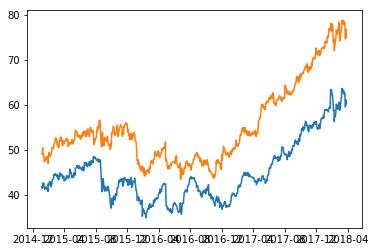

In [357]:
import matplotlib.pyplot as plt 

# take one of the conintegrated pairs as example
price_1 = dff.iloc[:,0]
price_2 = dff.iloc[:,14]

plt.plot(price_1)
plt.plot(price_2)
# we can see the conintegrated pairs of 'ABT' and 'AME' have similar pattern of price path 

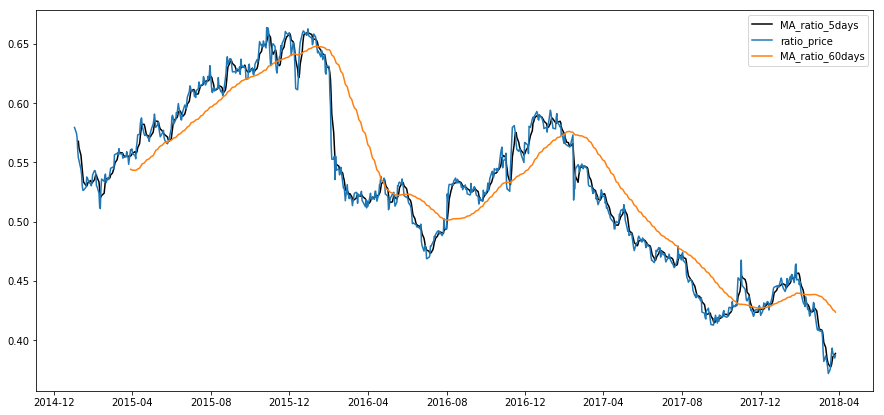

In [23]:
MA_5days = ratio_price.rolling(window =5, center = False).mean()
MA_60days = ratio_price.rolling(window =60, center = False).mean()

fig = plt.figure(figsize=[15,7])
plt.plot(MA_5days, color = 'black')
plt.plot(ratio_price)
plt.plot(MA_60days)
plt.legend(['MA_ratio_5days','ratio_price','MA_ratio_60days'])
# the result below shows that there are only few reverting (cross) of long-term and short-term moving average 


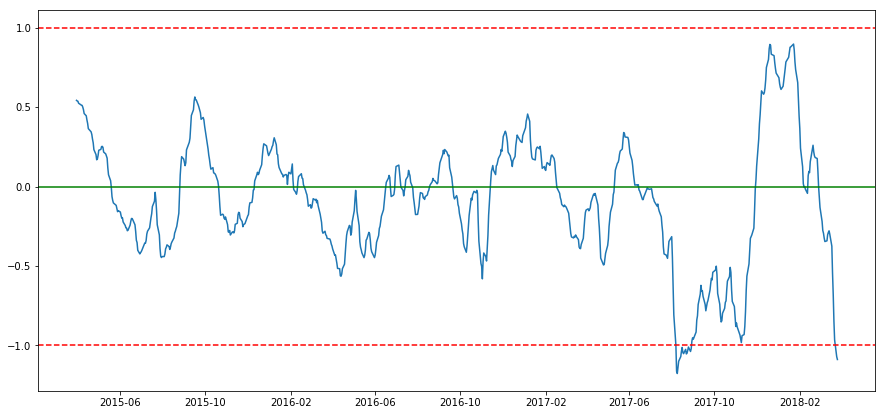

In [11]:
import matplotlib.pyplot as plt 
def z_score(price1,price2):
    ratio_price = price1/price2
    MA_5days = ratio_price.rolling(window =5, center = False).mean()
    MA_60days = ratio_price.rolling(window =60, center = False).mean()
    
    z_score_60d_5d = (MA_60days - MA_5days)/MA_5days.std()
    return z_score_60d_5d
# one of the cointegrated pairs: ABT & AME
fig = plt.figure(figsize=[15,7])
z_score_60d_5d = z_score(dff.iloc[:,0],dff.iloc[:,14])
plt.plot(z_score_60d_5d)
plt.axhline(0, color = 'green')
plt.axhline(1, color = 'red', linestyle = '--')
plt.axhline(-1, color = 'red', linestyle = '--')
# as it can be seen from the graph, the fluctuation of z_score of moving average will go back to mean 

In [22]:
dff.corr()

,ABT,ABBV,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,ADM,ARNC,AJG,AIZ,ATO,T,ADSK,ADP,AZO,AVB,AVY,BLL,BAC,BK,BAX,BDX,BBY,BIIB
ABT,1.000000,0.918121,0.671683,0.264343,0.705603,0.514246,0.667944,0.497843,0.879295,0.362977,0.738638,0.439399,0.902487,0.282830,0.945079,0.821748,0.804099,0.773227,0.893315,0.908383,0.747549,0.687553,-0.447324,0.262042,0.887937,0.771642,0.501062,0.255784,0.395099,0.809304,0.374259,0.430709,0.097572,0.775752,0.731432,-0.449584,0.170596,0.770159,0.527898,0.820293,0.804434,0.755593,0.734293,0.806920,0.251883
ABBV,0.918121,1.000000,0.805949,0.442505,0.854574,0.669563,0.564961,0.645886,0.808057,0.366959,0.823900,0.640891,0.835300,0.011156,0.912467,0.820121,0.888598,0.824751,0.938735,0.905459,0.832275,0.819870,-0.440790,0.400121,0.843167,0.857326,0.666461,0.172894,0.244007,0.889619,0.514714,0.611640,0.324516,0.823738,0.831335,-0.291538,0.211413,0.901957,0.600199,0.863869,0.846470,0.859364,0.858668,0.870104,0.032406
GOOG,0.671683,0.805949,1.000000,0.812004,0.967357,0.889971,0.451338,0.851330,0.589349,0.558799,0.911810,0.875129,0.645319,-0.323512,0.776556,0.777806,0.901562,0.869717,0.896754,0.794889,0.885868,0.954529,-0.483001,0.694485,0.777244,0.902021,0.738102,-0.113251,-0.011928,0.869134,0.860389,0.891702,0.632138,0.895666,0.910712,-0.190986,0.605426,0.951809,0.746430,0.852355,0.850642,0.936971,0.948050,0.870615,-0.412616
MO,0.264343,0.442505,0.812004,1.000000,0.763470,0.871639,0.191825,0.844245,0.288810,0.542645,0.741828,0.889847,0.342582,-0.514055,0.388298,0.561315,0.685729,0.710820,0.576359,0.492142,0.721820,0.816891,-0.182289,0.847171,0.494537,0.721809,-0.017552,-0.057271,-0.030221,0.686644,0.911404,0.902063,0.873929,0.681788,0.765490,-0.044857,0.758710,0.731892,0.669396,0.623839,0.625337,0.767810,0.789900,0.636315,-0.595367
AMZN,0.705603,0.854574,0.967357,0.763470,1.000000,0.843740,0.425450,0.798347,0.610421,0.519255,0.901018,0.846617,0.656508,-0.283058,0.787657,0.780318,0.903859,0.869974,0.912384,0.805652,0.879366,0.956152,-0.439665,0.649515,0.778123,0.899738,0.353901,-0.006923,0.004431,0.901358,0.808517,0.845231,0.625715,0.883409,0.897887,-0.167413,0.482463,0.953977,0.730514,0.866698,0.858761,0.929764,0.950838,0.883536,-0.372507
AEE,0.514246,0.669563,0.889971,0.871639,0.843740,1.000000,0.349996,0.977208,0.530157,0.499677,0.925349,0.965960,0.575459,-0.544177,0.613031,0.716117,0.876209,0.843894,0.764652,0.683940,0.907375,0.912535,-0.297136,0.878048,0.704862,0.896852,-0.512521,0.007140,0.093339,0.853759,0.889311,0.977513,0.758373,0.871434,0.908781,-0.292262,0.752068,0.881599,0.781731,0.755708,0.778082,0.919133,0.916760,0.790778,-0.418847
AAL,0.667944,0.564961,0.451338,0.191825,0.425450,0.349996,1.000000,0.274308,0.805726,0.376571,0.467294,0.197816,0.790288,0.323118,0.707945,0.486604,0.619525,0.630171,0.623821,0.697155,0.518826,0.454817,-0.103174,0.137649,0.733373,0.619766,0.427400,0.302197,0.535593,0.591392,0.238778,0.226981,-0.049598,0.653748,0.598839,-0.499684,0.130684,0.443291,0.391113,0.720621,0.661386,0.506168,0.460752,0.713104,0.316841
AEP,0.497843,0.645886,0.851330,0.844245,0.798347,0.977208,0.274308,1.000000,0.473875,0.382551,0.915815,0.963731,0.522719,-0.540303,0.578902,0.699546,0.826371,0.773492,0.736630,0.653625,0.878387,0.863659,-0.324894,0.860169,0.658808,0.853330,-0.576232,-0.043635,0.111515,0.804692,0.843358,0.969591,0.738616,0.820386,0.854574,-0.311971,0.778720,0.860693,0.756598,0.669285,0.700738,0.898155,0.889160,0.736797,-0.416659
AXP,0.879295,0.808057,0.589349,0.288810,0.610421,0.530157,0.805726,0.473875,1.000000,0.472789,0.696150,0.397442,0.972614,0.223545,0.894708,0.701096,0.801888,0.802466,0.820704,0.886361,0.726535,0.644055,-0.249090,0.308283,0.900836,0.782072,0.273467,0.445379,0.554085,0.812734,0.408567,0.393181,0.076140,0.783910,0.750796,-0.550020,0.210747,0.682432,0.500089,0.874100,0.845260,0.711872,0.679054,0.838195,0.300780
AIG,0.362977,0.366959,0.558799,0.542645,0.519255,0.499677,0.376571,0.382551,0.472789,1.000

In [41]:
# print(z_score_20d_5d[z_score_20d_5d>1].shape[0])
# print(z_score_20d_5d.shape[0])

def trade(pair_list, dff):
    
    for j in pair_list:
        price1 = dff.iloc[:,j[0]]
        price2 = dff.iloc[:,j[1]]

        ratio_price = price1/price2
        z_score_60d_5d = z_score(price1,price2)
        temp = []
        money =0
        position_stock1 = 0 
        position_stock2 = 0
        for i in range(z_score_60d_5d.shape[0]):
            if z_score_60d_5d[i] > 1:
                # ratio = price1/ price2
                # expected price going down, so short the equity (money inflow)
                # the z_score will revert back to zero
                # when the sd > 1 , short the ratio(short price1, long price2 )

                money += price1[i] - ratio_price[i]*price2[i]

                position_stock1 -= 1 # short 
                position_stock2 += ratio_price[i] #long 

            elif z_score_60d_5d[i] <-1:

                money -= price1[i] + ratio_price[i]*price2[i]

                position_stock1 += 1 #long 
                position_stock2 -= ratio_price[i] #short
            elif abs(z_score_60d_5d[i]) < 0.5:
                # clear the position when the price revert back to mean 
                money += position_stock1*price1[i] + position_stock2*price2[i]
                position_stock1 = 0 
                position_stock2 = 0 
        if money > 0:
            print('pairs: {}\nmoney:: {}'.format(j,money))
    return money 
            


print(trade(pair_list, dff))

'''
I download 50 stocks from quandl, but 7 of them is missing. Hence, after preprocessing, the data is left
43 stocks. 
The result below shows, under the threshold of -1 and 1 of z score, the are three pairs with positive money
inflow

'''

pairs: [10, 21]
money:: 24.292681764106426
pairs: [15, 17]
money:: 5.886521661392408
pairs: [21, 33]
money:: 20.03365869760404
0


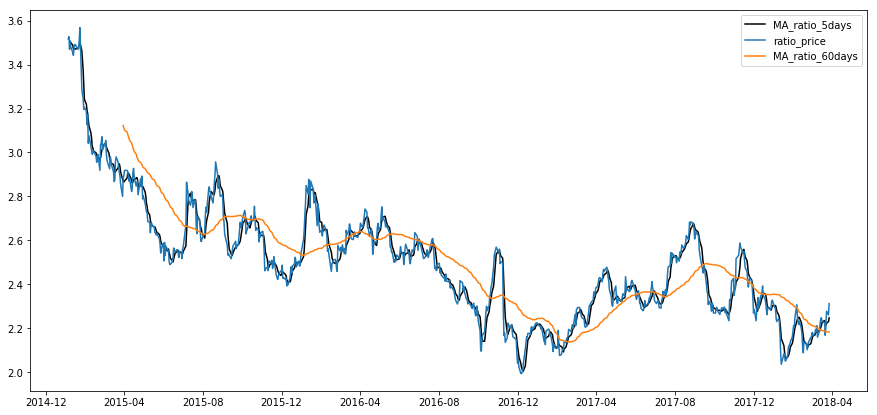

In [45]:
price_1 = dff.iloc[:,10]
price_2 = dff.iloc[:,21]
ratio_prices=price_1/price_2
MA_5dayss = ratio_prices.rolling(window =5, center = False).mean()
MA_60dayss = ratio_prices.rolling(window =60, center = False).mean()

fig = plt.figure(figsize=[15,7])
plt.plot(MA_5dayss, color = 'black')
plt.plot(ratio_prices)
plt.plot(MA_60dayss)
plt.legend(['MA_ratio_5days','ratio_price','MA_ratio_60days'])

'''
compared to previous example of pairs of 'ABT' & 'AME', the pair of [10,21] ('AMT' and 'AOS') has much more cross  
between 60days moving average and 5 days moving average
'''
